### Imports & Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
url='https://s3.amazonaws.com/csvpastebin/uploads/b42c82a21d1e2d737f2da05d6c96d790/brands_data.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.to_csv('OpenSponsorship_Data.csv') 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2041 entries, 0 to 2040
Data columns (total 8 columns):
name                    782 non-null object
brand_category          233 non-null object
product_category        583 non-null object
created                 2041 non-null object
last_active             2038 non-null object
last_onboarding_step    2041 non-null int64
saw_discovery           2041 non-null bool
address_country         555 non-null object
dtypes: bool(1), int64(1), object(6)
memory usage: 113.7+ KB


In [6]:
df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN


Text(0.5, 1, 'Missing Data')

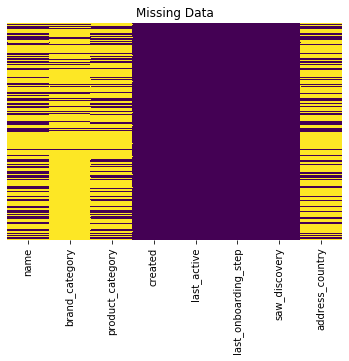

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [8]:
df.product_category.unique()

array([nan, 'Outdoors', 'Art', 'Personal Care',
       'Commercial  & Professional Services', 'Automobiles', 'Marketing',
       'Food & Beverage', 'Health & Medical', 'Apparel & Jewelry',
       'Sport & Fitness Centers', 'Telecommunication Services',
       'Pharmaceuticals Biotechnology & Life Sciences',
       'Consumer Durables', 'Technology Hardware & Equipment',
       'Retailing', 'Insurance', 'Lifestyle Services', 'Pets',
       'Software & Services', 'Consumer Services', 'Transportation',
       'Health Care Supplies', 'Utilities', 'Energy',
       'Diversified Financials', 'Banks', 'Real Estate',
       'Food Distributors', 'Footwear', 'Belts', 'Golf Courses'],
      dtype=object)

In [9]:
len(df.product_category.unique())

32

In [10]:
df['product_category'].value_counts()

Apparel & Jewelry                                102
Food & Beverage                                   70
Health & Medical                                  69
Marketing                                         52
Personal Care                                     41
Lifestyle Services                                32
Software & Services                               28
Commercial  & Professional Services               26
Technology Hardware & Equipment                   22
Art                                               21
Outdoors                                          21
Consumer Durables                                 15
Retailing                                         14
Consumer Services                                 12
Automobiles                                       10
Transportation                                     8
Telecommunication Services                         7
Pets                                               5
Insurance                                     

In [11]:
df['brand_category'].value_counts()

/art and entertainment/shows and events                       28
/food and drink/food                                          21
/food and drink                                               15
/health and fitness                                           10
/style and fashion                                             7
                                                              ..
/style and fashion/beauty/cosmetics                            1
/technology and computing/networking/vpn and remote access     1
/sports/bobsled                                                1
/sports/boat racing                                            1
/sports/hunting and shooting                                   1
Name: brand_category, Length: 103, dtype: int64

In [12]:
len(df['brand_category'].value_counts())

103

In [13]:
df['address_country'].value_counts()

United States           393
India                    44
Canada                   20
United Kingdom           19
Australia                11
Mexico                    4
South Africa              4
Brazil                    3
France                    3
Switzerland               3
Italy                     2
Norway                    2
Indonesia                 2
Bangladesh                2
Hong Kong                 2
United Arab Emirates      2
Zimbabwe                  2
Uganda                    2
Israel                    2
Portugal                  2
Netherlands               2
Sweden                    2
Russia                    2
Malaysia                  1
Argentina                 1
China                     1
Morocco                   1
South Korea               1
Nigeria                   1
Macedonia (FYROM)         1
Kenya                     1
Pakistan                  1
Estonia                   1
Puerto Rico               1
Liberia                   1
Monaco              

In [14]:
df['last_onboarding_step'].value_counts()

2    839
1    576
3    484
0    142
Name: last_onboarding_step, dtype: int64

In [ ]:
df['last_onboarding_step'].value_counts()